In [1]:
import seq2seq_LSTM
from keras.models import load_model
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

%pylab inline

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


Number of Bassline Unique Words: 
		 36
Bassline Unique Words:  
		  [   0   21   22   23   24   25   26   27   28   29   30   31   32   33
   34   35   36   37   38   39   40   41   42   43   44   45   46   47
   48   49   50   51   54 1000]
drum_dataset_int_words_tokens 
 {0: 1, 1: 2, 3: 3, 5: 4, 6: 5, 7: 6, 8: 7, 135: 8, 15: 9, 143: 10, 16: 11, 20: 12, 23: 13, 24: 14, 31: 15, 160: 16, 32: 17, 159: 18, 39: 19, 47: 20, 56: 21, 63: 22, 192: 23, 199: 24, 71: 25, 200: 26, 207: 27, 88: 28, 216: 29, 95: 30, 224: 31, 223: 32, 96: 33, 228: 34, 231: 35, 232: 36, 234: 37, 127: 38, 239: 39, 240: 40, 247: 41, 248: 42, 249: 43, 251: 44, 252: 45, 253: 46, 255: 47}
target_words_tokens 
 {0: 1, 21: 2, 22: 3, 23: 4, 24: 5, 25: 6, 26: 7, 27: 8, 28: 9, 29: 10, 30: 11, 31: 12, 32: 13, 33: 14, 34: 15, 35: 16, 36: 17, 37: 18, 38: 19, 39: 20, 40: 21, 41: 22, 42: 23, 43: 24, 44: 25, 45: 26, 46: 27, 47: 28, 48: 29, 49: 30, 50: 31, 51: 32, 54: 33, 1000: 34}
target_in_words_tokens 
 {0: 1, 'S': 2, 21: 3, 22: 4

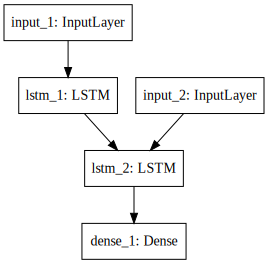

In [2]:
nbars = 2 # <<<<<<<<<<<<<<<<<<<<

bassline_dataset_file = "../data/bassline_size_50[WithOffet]_translated_to_midi_36-"+str(int(nbars))+"bars.txt"
drum_dataset_file = "../data/drum_size_50.txt"

drum_dataset_0b, drum_dataset_int, bassline_dataset = seq2seq_LSTM.get_sequences(bassline_dataset_file, drum_dataset_file)

output_cardinality = len(np.unique(bassline_dataset))+2 # <<<<<<<<<<<<<<<<<<<< +1 is for the starting character
input_cardinality = 2**8 # <<<<<<<<<<<<<<<<<<<<

print("Number of Bassline Unique Words: \n\t\t", output_cardinality)
print("Bassline Unique Words:  \n\t\t ", np.unique(bassline_dataset))

# configure problem
n_features_drums = input_cardinality           # 2^8 different unique drum combinations #Cardinality of Input
n_features_bassline = output_cardinality        #Cardinality of Output
n_units = 128

# define model
train, infenc, infdec = seq2seq_LSTM.define_models(input_cardinality, output_cardinality, n_units)
train.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

encoder_input, decoder_input, decoder_output, drum_dataset_int_words_tokens, target_words_tokens, target_in_words_tokens = seq2seq_LSTM.get_dataset(drum_dataset_int, 
                                                                                                                                                    bassline_dataset, 
                                                                                                                                                    padding_value = "S", 
                                                                                                                                                    input_cardinality=input_cardinality, 
                                                                                                                                                    output_cardinality=output_cardinality)

#print("encoder_input", encoder_input)
#print("decoder_input", decoder_input)
#print("decoder_output", decoder_output)

print ("drum_dataset_int_words_tokens \n", drum_dataset_int_words_tokens)
print ("target_words_tokens \n", target_words_tokens)
print ("target_in_words_tokens \n", target_in_words_tokens)

# Show Summary
train.summary()

# plot_model(train, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
plot_model(train, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
SVG(model_to_dot(train).create(prog='dot', format='svg'))



In [3]:
epochs = 4000

In [4]:
history = train.fit([encoder_input, decoder_input], decoder_output, epochs=epochs)
infenc.save("infenc_epoch_"+str(epochs)+"_InputCar_"+str(input_cardinality)+
            "_OutputCar_"+str(output_cardinality)+"_n_units_"+str(n_units)+".h5")
infdec.save("infdec_epoch_"+str(epochs)+"_InputCar_"+str(input_cardinality)+
            "_OutputCar_"+str(output_cardinality)+"_n_units_"+str(n_units)+".h5")

Epoch 1/4000
50/50 [==============================] - 1s 22ms/step - loss: 3.5839 - acc: 0.0253
Epoch 2/4000
50/50 [==============================] - 0s 3ms/step - loss: 3.5359 - acc: 0.3034
Epoch 3/4000
50/50 [==============================] - 0s 3ms/step - loss: 3.4802 - acc: 0.3800
Epoch 4/4000
50/50 [==============================] - 0s 3ms/step - loss: 3.4035 - acc: 0.3794
Epoch 5/4000
50/50 [==============================] - 0s 3ms/step - loss: 3.2608 - acc: 0.3688
Epoch 6/4000
50/50 [==============================] - 0s 3ms/step - loss: 2.9152 - acc: 0.3600
Epoch 7/4000
50/50 [==============================] - 0s 3ms/step - loss: 2.4395 - acc: 0.3541
Epoch 8/4000
50/50 [==============================] - 0s 3ms/step - loss: 2.2727 - acc: 0.3487
Epoch 9/4000
50/50 [==============================] - 0s 3ms/step - loss: 2.2328 - acc: 0.3563
Epoch 10/4000
50/50 [==============================] - 0s 3ms/step - loss: 2.2102 - acc: 0.2991
Epoch 11/4000
50/50 [===========================

50/50 [==============================] - 0s 3ms/step - loss: 1.9565 - acc: 0.4469
Epoch 87/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.9543 - acc: 0.4441
Epoch 88/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.9546 - acc: 0.4338
Epoch 89/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.9505 - acc: 0.4409
Epoch 90/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.9576 - acc: 0.4478
Epoch 91/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.9458 - acc: 0.4438
Epoch 92/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.9465 - acc: 0.4400
Epoch 93/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.9456 - acc: 0.4394
Epoch 94/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.9404 - acc: 0.4447
Epoch 95/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.9411 - acc: 0.4412
Epoch 96/4000
50/50 [==============================] -

50/50 [==============================] - 0s 3ms/step - loss: 1.7014 - acc: 0.4872
Epoch 171/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.6971 - acc: 0.4806
Epoch 172/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.7018 - acc: 0.4881
Epoch 173/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.6914 - acc: 0.4887
Epoch 174/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.6958 - acc: 0.4834
Epoch 175/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.6886 - acc: 0.4891
Epoch 176/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.6845 - acc: 0.4856
Epoch 177/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.6859 - acc: 0.4875
Epoch 178/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.6785 - acc: 0.4872
Epoch 179/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.6728 - acc: 0.4937
Epoch 180/4000
50/50 [=======================

50/50 [==============================] - 0s 3ms/step - loss: 1.4401 - acc: 0.5422
Epoch 255/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.4516 - acc: 0.5369
Epoch 256/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.4362 - acc: 0.5428
Epoch 257/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.4329 - acc: 0.5416
Epoch 258/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.4283 - acc: 0.5475
Epoch 259/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.4180 - acc: 0.5472
Epoch 260/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.4145 - acc: 0.5491
Epoch 261/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.4053 - acc: 0.5547
Epoch 262/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.4029 - acc: 0.5469
Epoch 263/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.4004 - acc: 0.5522
Epoch 264/4000
50/50 [=======================

50/50 [==============================] - 0s 3ms/step - loss: 1.1701 - acc: 0.6138
Epoch 339/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.1671 - acc: 0.6153
Epoch 340/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.1654 - acc: 0.6216
Epoch 341/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.1737 - acc: 0.6091
Epoch 342/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.1728 - acc: 0.6181
Epoch 343/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.1654 - acc: 0.6206
Epoch 344/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.1604 - acc: 0.6209
Epoch 345/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.1593 - acc: 0.6206
Epoch 346/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.1605 - acc: 0.6109
Epoch 347/4000
50/50 [==============================] - 0s 3ms/step - loss: 1.1526 - acc: 0.6253
Epoch 348/4000
50/50 [=======================

50/50 [==============================] - 0s 3ms/step - loss: 0.9458 - acc: 0.6853
Epoch 423/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.9476 - acc: 0.6850
Epoch 424/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.9446 - acc: 0.6900
Epoch 425/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.9462 - acc: 0.6909
Epoch 426/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.9420 - acc: 0.6941
Epoch 427/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.9445 - acc: 0.6844
Epoch 428/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.9489 - acc: 0.6997
Epoch 429/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.9425 - acc: 0.6850
Epoch 430/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.9324 - acc: 0.6903
Epoch 431/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.9334 - acc: 0.6928
Epoch 432/4000
50/50 [=======================

50/50 [==============================] - 0s 3ms/step - loss: 0.7766 - acc: 0.7516
Epoch 507/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.7669 - acc: 0.7516
Epoch 508/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.7776 - acc: 0.7491
Epoch 509/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.7855 - acc: 0.7447
Epoch 510/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.7918 - acc: 0.7403
Epoch 511/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.7874 - acc: 0.7462
Epoch 512/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.7933 - acc: 0.7366
Epoch 513/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.7905 - acc: 0.7378
Epoch 514/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.7861 - acc: 0.7444
Epoch 515/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.8068 - acc: 0.7281
Epoch 516/4000
50/50 [=======================

50/50 [==============================] - 0s 3ms/step - loss: 0.5809 - acc: 0.8234
Epoch 591/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.5788 - acc: 0.8231
Epoch 592/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.5752 - acc: 0.8247
Epoch 593/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.5725 - acc: 0.8253
Epoch 594/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.5680 - acc: 0.8294
Epoch 595/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.5670 - acc: 0.8300
Epoch 596/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.5642 - acc: 0.8319
Epoch 597/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.5616 - acc: 0.8325
Epoch 598/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.5578 - acc: 0.8316
Epoch 599/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.5563 - acc: 0.8363
Epoch 600/4000
50/50 [=======================

50/50 [==============================] - 0s 3ms/step - loss: 0.4245 - acc: 0.8853
Epoch 675/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.4298 - acc: 0.8778
Epoch 676/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.4307 - acc: 0.8775
Epoch 677/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.4338 - acc: 0.8762
Epoch 678/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.4454 - acc: 0.8641
Epoch 679/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.4502 - acc: 0.8719
Epoch 680/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.4414 - acc: 0.8706
Epoch 681/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.4383 - acc: 0.8750
Epoch 682/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.4475 - acc: 0.8669
Epoch 683/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.4593 - acc: 0.8650
Epoch 684/4000
50/50 [=======================

50/50 [==============================] - 0s 3ms/step - loss: 0.3123 - acc: 0.9306
Epoch 759/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.3110 - acc: 0.9263
Epoch 760/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.3076 - acc: 0.9256
Epoch 761/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.3048 - acc: 0.9288
Epoch 762/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.3057 - acc: 0.9247
Epoch 763/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.3048 - acc: 0.9291
Epoch 764/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.3013 - acc: 0.9353
Epoch 765/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.2971 - acc: 0.9366
Epoch 766/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.2990 - acc: 0.9331
Epoch 767/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.2968 - acc: 0.9334
Epoch 768/4000
50/50 [=======================

50/50 [==============================] - 0s 3ms/step - loss: 0.2125 - acc: 0.9647
Epoch 843/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.2116 - acc: 0.9647
Epoch 844/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.2188 - acc: 0.9641
Epoch 845/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.2192 - acc: 0.9591
Epoch 846/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.2191 - acc: 0.9613
Epoch 847/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.2233 - acc: 0.9628
Epoch 848/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.2232 - acc: 0.9581
Epoch 849/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.2227 - acc: 0.9569
Epoch 850/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.2240 - acc: 0.9559
Epoch 851/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.2301 - acc: 0.9537
Epoch 852/4000
50/50 [=======================

50/50 [==============================] - 0s 3ms/step - loss: 0.3167 - acc: 0.9256
Epoch 927/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.3133 - acc: 0.9294
Epoch 928/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.3102 - acc: 0.9297
Epoch 929/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.3065 - acc: 0.9347
Epoch 930/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.3033 - acc: 0.9356
Epoch 931/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.3002 - acc: 0.9359
Epoch 932/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.2973 - acc: 0.9375
Epoch 933/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.2943 - acc: 0.9375
Epoch 934/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.2919 - acc: 0.9391
Epoch 935/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.2891 - acc: 0.9400
Epoch 936/4000
50/50 [=======================

50/50 [==============================] - 0s 3ms/step - loss: 0.1742 - acc: 0.9762
Epoch 1011/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.1741 - acc: 0.9741
Epoch 1012/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.1729 - acc: 0.9759
Epoch 1013/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.1715 - acc: 0.9759
Epoch 1014/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.1720 - acc: 0.9741
Epoch 1015/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.1729 - acc: 0.9750
Epoch 1016/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.1759 - acc: 0.9731
Epoch 1017/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.1741 - acc: 0.9741
Epoch 1018/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.1756 - acc: 0.9728
Epoch 1019/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.1731 - acc: 0.9731
Epoch 1020/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.1187 - acc: 0.9894
Epoch 1094/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.1168 - acc: 0.9891
Epoch 1095/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.1172 - acc: 0.9869
Epoch 1096/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.1162 - acc: 0.9900
Epoch 1097/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.1176 - acc: 0.9884
Epoch 1098/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.1175 - acc: 0.9881
Epoch 1099/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.1163 - acc: 0.9875
Epoch 1100/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.1176 - acc: 0.9875
Epoch 1101/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.1166 - acc: 0.9888
Epoch 1102/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.1162 - acc: 0.9875
Epoch 1103/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0807 - acc: 0.9969
Epoch 1177/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0806 - acc: 0.9956
Epoch 1178/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0809 - acc: 0.9956
Epoch 1179/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0798 - acc: 0.9950
Epoch 1180/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0802 - acc: 0.9953
Epoch 1181/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0798 - acc: 0.9956
Epoch 1182/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0804 - acc: 0.9947
Epoch 1183/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0809 - acc: 0.9956
Epoch 1184/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0811 - acc: 0.9947
Epoch 1185/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0812 - acc: 0.9947
Epoch 1186/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0603 - acc: 0.9972
Epoch 1260/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0600 - acc: 0.9978
Epoch 1261/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0612 - acc: 0.9975
Epoch 1262/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0601 - acc: 0.9981
Epoch 1263/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0586 - acc: 0.9984
Epoch 1264/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0595 - acc: 0.9981
Epoch 1265/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0584 - acc: 0.9981
Epoch 1266/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0576 - acc: 0.9987
Epoch 1267/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0583 - acc: 0.9978
Epoch 1268/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0569 - acc: 0.9984
Epoch 1269/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.5632 - acc: 0.8269
Epoch 1343/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.5406 - acc: 0.8341
Epoch 1344/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.5203 - acc: 0.8416
Epoch 1345/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.5008 - acc: 0.8469
Epoch 1346/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.4814 - acc: 0.8544
Epoch 1347/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.4635 - acc: 0.8638
Epoch 1348/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.4472 - acc: 0.8687
Epoch 1349/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.4309 - acc: 0.8775
Epoch 1350/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.4156 - acc: 0.8828
Epoch 1351/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.4009 - acc: 0.8884
Epoch 1352/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0866 - acc: 0.9944
Epoch 1426/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0857 - acc: 0.9934
Epoch 1427/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0842 - acc: 0.9941
Epoch 1428/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0834 - acc: 0.9947
Epoch 1429/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0825 - acc: 0.9944
Epoch 1430/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0815 - acc: 0.9947
Epoch 1431/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0805 - acc: 0.9947
Epoch 1432/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0800 - acc: 0.9947
Epoch 1433/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0788 - acc: 0.9953
Epoch 1434/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0783 - acc: 0.9947
Epoch 1435/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0486 - acc: 0.9997
Epoch 1509/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0481 - acc: 0.9994
Epoch 1510/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0476 - acc: 0.9994
Epoch 1511/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0474 - acc: 0.9997
Epoch 1512/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0469 - acc: 0.9997
Epoch 1513/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0467 - acc: 0.9997
Epoch 1514/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0461 - acc: 0.9997
Epoch 1515/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0460 - acc: 0.9997
Epoch 1516/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0455 - acc: 0.9997
Epoch 1517/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0454 - acc: 0.9997
Epoch 1518/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0317 - acc: 1.0000
Epoch 1592/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0315 - acc: 1.0000
Epoch 1593/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0314 - acc: 1.0000
Epoch 1594/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0313 - acc: 1.0000
Epoch 1595/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0311 - acc: 1.0000
Epoch 1596/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0310 - acc: 1.0000
Epoch 1597/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0309 - acc: 1.0000
Epoch 1598/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0308 - acc: 1.0000
Epoch 1599/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0306 - acc: 1.0000
Epoch 1600/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0305 - acc: 1.0000
Epoch 1601/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0233 - acc: 1.0000
Epoch 1675/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0232 - acc: 1.0000
Epoch 1676/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0231 - acc: 1.0000
Epoch 1677/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0230 - acc: 1.0000
Epoch 1678/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0230 - acc: 1.0000
Epoch 1679/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0229 - acc: 1.0000
Epoch 1680/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0228 - acc: 1.0000
Epoch 1681/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0228 - acc: 1.0000
Epoch 1682/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0227 - acc: 1.0000
Epoch 1683/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0229 - acc: 1.0000
Epoch 1684/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0179 - acc: 1.0000
Epoch 1758/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0178 - acc: 1.0000
Epoch 1759/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0178 - acc: 1.0000
Epoch 1760/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0177 - acc: 1.0000
Epoch 1761/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0177 - acc: 1.0000
Epoch 1762/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0176 - acc: 1.0000
Epoch 1763/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0176 - acc: 1.0000
Epoch 1764/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0175 - acc: 1.0000
Epoch 1765/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0175 - acc: 1.0000
Epoch 1766/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0174 - acc: 1.0000
Epoch 1767/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.1503 - acc: 0.9644
Epoch 1841/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.1322 - acc: 0.9731
Epoch 1842/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.1228 - acc: 0.9741
Epoch 1843/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.1138 - acc: 0.9806
Epoch 1844/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.1042 - acc: 0.9831
Epoch 1845/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0923 - acc: 0.9900
Epoch 1846/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0859 - acc: 0.9912
Epoch 1847/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0791 - acc: 0.9934
Epoch 1848/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0732 - acc: 0.9950
Epoch 1849/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0695 - acc: 0.9963
Epoch 1850/4000
50/50 [=============

50/50 [==============================] - 0s 4ms/step - loss: 0.0188 - acc: 1.0000
Epoch 1924/4000
50/50 [==============================] - 0s 4ms/step - loss: 0.0187 - acc: 1.0000
Epoch 1925/4000
50/50 [==============================] - 0s 4ms/step - loss: 0.0186 - acc: 1.0000
Epoch 1926/4000
50/50 [==============================] - 0s 4ms/step - loss: 0.0185 - acc: 1.0000
Epoch 1927/4000
50/50 [==============================] - 0s 4ms/step - loss: 0.0184 - acc: 1.0000
Epoch 1928/4000
50/50 [==============================] - 0s 4ms/step - loss: 0.0183 - acc: 1.0000
Epoch 1929/4000
50/50 [==============================] - 0s 4ms/step - loss: 0.0181 - acc: 1.0000
Epoch 1930/4000
50/50 [==============================] - 0s 4ms/step - loss: 0.0180 - acc: 1.0000
Epoch 1931/4000
50/50 [==============================] - 0s 4ms/step - loss: 0.0179 - acc: 1.0000
Epoch 1932/4000
50/50 [==============================] - 0s 4ms/step - loss: 0.0178 - acc: 1.0000
Epoch 1933/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0127 - acc: 1.0000
Epoch 2007/4000
50/50 [==============================] - 0s 4ms/step - loss: 0.0126 - acc: 1.0000
Epoch 2008/4000
50/50 [==============================] - 0s 6ms/step - loss: 0.0126 - acc: 1.0000
Epoch 2009/4000
50/50 [==============================] - 0s 5ms/step - loss: 0.0125 - acc: 1.0000
Epoch 2010/4000
50/50 [==============================] - 0s 4ms/step - loss: 0.0125 - acc: 1.0000
Epoch 2011/4000
50/50 [==============================] - 0s 4ms/step - loss: 0.0125 - acc: 1.0000
Epoch 2012/4000
50/50 [==============================] - 0s 5ms/step - loss: 0.0124 - acc: 1.0000
Epoch 2013/4000
50/50 [==============================] - 0s 5ms/step - loss: 0.0124 - acc: 1.0000
Epoch 2014/4000
50/50 [==============================] - 0s 5ms/step - loss: 0.0123 - acc: 1.0000
Epoch 2015/4000
50/50 [==============================] - 0s 5ms/step - loss: 0.0123 - acc: 1.0000
Epoch 2016/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0098 - acc: 1.0000
Epoch 2090/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0098 - acc: 1.0000
Epoch 2091/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0098 - acc: 1.0000
Epoch 2092/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0097 - acc: 1.0000
Epoch 2093/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0097 - acc: 1.0000
Epoch 2094/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0097 - acc: 1.0000
Epoch 2095/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0097 - acc: 1.0000
Epoch 2096/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0096 - acc: 1.0000
Epoch 2097/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0096 - acc: 1.0000
Epoch 2098/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0096 - acc: 1.0000
Epoch 2099/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0080 - acc: 1.0000
Epoch 2173/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0080 - acc: 1.0000
Epoch 2174/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0080 - acc: 1.0000
Epoch 2175/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0080 - acc: 1.0000
Epoch 2176/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0079 - acc: 1.0000
Epoch 2177/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0079 - acc: 1.0000
Epoch 2178/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0079 - acc: 1.0000
Epoch 2179/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0079 - acc: 1.0000
Epoch 2180/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0079 - acc: 1.0000
Epoch 2181/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0079 - acc: 1.0000
Epoch 2182/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0067 - acc: 1.0000
Epoch 2256/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0067 - acc: 1.0000
Epoch 2257/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0067 - acc: 1.0000
Epoch 2258/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0067 - acc: 1.0000
Epoch 2259/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0067 - acc: 1.0000
Epoch 2260/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0066 - acc: 1.0000
Epoch 2261/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0066 - acc: 1.0000
Epoch 2262/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0066 - acc: 1.0000
Epoch 2263/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0066 - acc: 1.0000
Epoch 2264/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0066 - acc: 1.0000
Epoch 2265/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0057 - acc: 1.0000
Epoch 2339/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0057 - acc: 1.0000
Epoch 2340/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0057 - acc: 1.0000
Epoch 2341/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0057 - acc: 1.0000
Epoch 2342/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0057 - acc: 1.0000
Epoch 2343/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0057 - acc: 1.0000
Epoch 2344/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0057 - acc: 1.0000
Epoch 2345/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0056 - acc: 1.0000
Epoch 2346/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0056 - acc: 1.0000
Epoch 2347/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0056 - acc: 1.0000
Epoch 2348/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0049 - acc: 1.0000
Epoch 2422/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0049 - acc: 1.0000
Epoch 2423/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0049 - acc: 1.0000
Epoch 2424/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0049 - acc: 1.0000
Epoch 2425/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0049 - acc: 1.0000
Epoch 2426/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0049 - acc: 1.0000
Epoch 2427/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0049 - acc: 1.0000
Epoch 2428/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0049 - acc: 1.0000
Epoch 2429/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0049 - acc: 1.0000
Epoch 2430/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0048 - acc: 1.0000
Epoch 2431/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0043 - acc: 1.0000
Epoch 2505/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0043 - acc: 1.0000
Epoch 2506/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0043 - acc: 1.0000
Epoch 2507/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0043 - acc: 1.0000
Epoch 2508/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0042 - acc: 1.0000
Epoch 2509/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0042 - acc: 1.0000
Epoch 2510/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0042 - acc: 1.0000
Epoch 2511/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0042 - acc: 1.0000
Epoch 2512/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0042 - acc: 1.0000
Epoch 2513/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0042 - acc: 1.0000
Epoch 2514/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0037 - acc: 1.0000
Epoch 2588/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0037 - acc: 1.0000
Epoch 2589/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0037 - acc: 1.0000
Epoch 2590/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0037 - acc: 1.0000
Epoch 2591/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0037 - acc: 1.0000
Epoch 2592/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0037 - acc: 1.0000
Epoch 2593/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0037 - acc: 1.0000
Epoch 2594/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0037 - acc: 1.0000
Epoch 2595/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0037 - acc: 1.0000
Epoch 2596/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0037 - acc: 1.0000
Epoch 2597/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0033 - acc: 1.0000
Epoch 2671/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0033 - acc: 1.0000
Epoch 2672/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0033 - acc: 1.0000
Epoch 2673/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0033 - acc: 1.0000
Epoch 2674/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0033 - acc: 1.0000
Epoch 2675/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0033 - acc: 1.0000
Epoch 2676/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0033 - acc: 1.0000
Epoch 2677/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0032 - acc: 1.0000
Epoch 2678/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0032 - acc: 1.0000
Epoch 2679/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0032 - acc: 1.0000
Epoch 2680/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 1.0000
Epoch 2754/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 1.0000
Epoch 2755/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 1.0000
Epoch 2756/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 1.0000
Epoch 2757/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 1.0000
Epoch 2758/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 1.0000
Epoch 2759/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 1.0000
Epoch 2760/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 1.0000
Epoch 2761/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 1.0000
Epoch 2762/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 1.0000
Epoch 2763/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0199 - acc: 1.0000
Epoch 2837/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0196 - acc: 1.0000
Epoch 2838/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0191 - acc: 1.0000
Epoch 2839/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0190 - acc: 1.0000
Epoch 2840/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0184 - acc: 1.0000
Epoch 2841/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0193 - acc: 0.9994
Epoch 2842/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0193 - acc: 0.9991
Epoch 2843/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0178 - acc: 1.0000
Epoch 2844/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0186 - acc: 0.9994
Epoch 2845/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0186 - acc: 0.9994
Epoch 2846/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0082 - acc: 1.0000
Epoch 2920/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0081 - acc: 1.0000
Epoch 2921/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0081 - acc: 1.0000
Epoch 2922/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0080 - acc: 1.0000
Epoch 2923/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0080 - acc: 1.0000
Epoch 2924/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0079 - acc: 1.0000
Epoch 2925/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0079 - acc: 1.0000
Epoch 2926/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0078 - acc: 1.0000
Epoch 2927/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0078 - acc: 1.0000
Epoch 2928/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0077 - acc: 1.0000
Epoch 2929/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0053 - acc: 1.0000
Epoch 3003/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0053 - acc: 1.0000
Epoch 3004/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0053 - acc: 1.0000
Epoch 3005/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0053 - acc: 1.0000
Epoch 3006/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0053 - acc: 1.0000
Epoch 3007/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0052 - acc: 1.0000
Epoch 3008/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0052 - acc: 1.0000
Epoch 3009/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0052 - acc: 1.0000
Epoch 3010/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0052 - acc: 1.0000
Epoch 3011/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0052 - acc: 1.0000
Epoch 3012/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0040 - acc: 1.0000
Epoch 3086/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0040 - acc: 1.0000
Epoch 3087/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0040 - acc: 1.0000
Epoch 3088/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0040 - acc: 1.0000
Epoch 3089/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0040 - acc: 1.0000
Epoch 3090/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0039 - acc: 1.0000
Epoch 3091/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0039 - acc: 1.0000
Epoch 3092/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0039 - acc: 1.0000
Epoch 3093/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0039 - acc: 1.0000
Epoch 3094/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0039 - acc: 1.0000
Epoch 3095/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0032 - acc: 1.0000
Epoch 3169/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0032 - acc: 1.0000
Epoch 3170/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0032 - acc: 1.0000
Epoch 3171/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0032 - acc: 1.0000
Epoch 3172/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0032 - acc: 1.0000
Epoch 3173/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0032 - acc: 1.0000
Epoch 3174/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0031 - acc: 1.0000
Epoch 3175/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0031 - acc: 1.0000
Epoch 3176/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0031 - acc: 1.0000
Epoch 3177/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0031 - acc: 1.0000
Epoch 3178/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0026 - acc: 1.0000
Epoch 3252/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0026 - acc: 1.0000
Epoch 3253/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0026 - acc: 1.0000
Epoch 3254/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0026 - acc: 1.0000
Epoch 3255/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0026 - acc: 1.0000
Epoch 3256/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0026 - acc: 1.0000
Epoch 3257/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0026 - acc: 1.0000
Epoch 3258/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0026 - acc: 1.0000
Epoch 3259/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0026 - acc: 1.0000
Epoch 3260/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0026 - acc: 1.0000
Epoch 3261/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 1.0000
Epoch 3335/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 1.0000
Epoch 3336/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 1.0000
Epoch 3337/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 1.0000
Epoch 3338/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 1.0000
Epoch 3339/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 1.0000
Epoch 3340/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 1.0000
Epoch 3341/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 1.0000
Epoch 3342/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 1.0000
Epoch 3343/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0022 - acc: 1.0000
Epoch 3344/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0019 - acc: 1.0000
Epoch 3418/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0019 - acc: 1.0000
Epoch 3419/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0019 - acc: 1.0000
Epoch 3420/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0019 - acc: 1.0000
Epoch 3421/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0019 - acc: 1.0000
Epoch 3422/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0019 - acc: 1.0000
Epoch 3423/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0019 - acc: 1.0000
Epoch 3424/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0019 - acc: 1.0000
Epoch 3425/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0019 - acc: 1.0000
Epoch 3426/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0019 - acc: 1.0000
Epoch 3427/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0017 - acc: 1.0000
Epoch 3501/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0017 - acc: 1.0000
Epoch 3502/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0017 - acc: 1.0000
Epoch 3503/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0017 - acc: 1.0000
Epoch 3504/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0017 - acc: 1.0000
Epoch 3505/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0017 - acc: 1.0000
Epoch 3506/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0017 - acc: 1.0000
Epoch 3507/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0017 - acc: 1.0000
Epoch 3508/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0017 - acc: 1.0000
Epoch 3509/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0016 - acc: 1.0000
Epoch 3510/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0015 - acc: 1.0000
Epoch 3584/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0015 - acc: 1.0000
Epoch 3585/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0015 - acc: 1.0000
Epoch 3586/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0015 - acc: 1.0000
Epoch 3587/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0015 - acc: 1.0000
Epoch 3588/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0015 - acc: 1.0000
Epoch 3589/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0015 - acc: 1.0000
Epoch 3590/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0015 - acc: 1.0000
Epoch 3591/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0015 - acc: 1.0000
Epoch 3592/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0015 - acc: 1.0000
Epoch 3593/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0013 - acc: 1.0000
Epoch 3667/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0013 - acc: 1.0000
Epoch 3668/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0013 - acc: 1.0000
Epoch 3669/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0013 - acc: 1.0000
Epoch 3670/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0013 - acc: 1.0000
Epoch 3671/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0013 - acc: 1.0000
Epoch 3672/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0013 - acc: 1.0000
Epoch 3673/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0013 - acc: 1.0000
Epoch 3674/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0013 - acc: 1.0000
Epoch 3675/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0013 - acc: 1.0000
Epoch 3676/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0012 - acc: 1.0000
Epoch 3750/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0012 - acc: 1.0000
Epoch 3751/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0012 - acc: 1.0000
Epoch 3752/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0012 - acc: 1.0000
Epoch 3753/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0012 - acc: 1.0000
Epoch 3754/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0011 - acc: 1.0000
Epoch 3755/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0011 - acc: 1.0000
Epoch 3756/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0011 - acc: 1.0000
Epoch 3757/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0011 - acc: 1.0000
Epoch 3758/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0011 - acc: 1.0000
Epoch 3759/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 0.0010 - acc: 1.0000
Epoch 3833/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0010 - acc: 1.0000
Epoch 3834/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0010 - acc: 1.0000
Epoch 3835/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0010 - acc: 1.0000
Epoch 3836/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0010 - acc: 1.0000
Epoch 3837/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0010 - acc: 1.0000
Epoch 3838/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0010 - acc: 1.0000
Epoch 3839/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0010 - acc: 1.0000
Epoch 3840/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0010 - acc: 1.0000
Epoch 3841/4000
50/50 [==============================] - 0s 3ms/step - loss: 0.0010 - acc: 1.0000
Epoch 3842/4000
50/50 [=============

50/50 [==============================] - 0s 3ms/step - loss: 9.2958e-04 - acc: 1.0000
Epoch 3914/4000
50/50 [==============================] - 0s 3ms/step - loss: 9.2836e-04 - acc: 1.0000
Epoch 3915/4000
50/50 [==============================] - 0s 3ms/step - loss: 9.2711e-04 - acc: 1.0000
Epoch 3916/4000
50/50 [==============================] - 0s 3ms/step - loss: 9.2590e-04 - acc: 1.0000
Epoch 3917/4000
50/50 [==============================] - 0s 3ms/step - loss: 9.2476e-04 - acc: 1.0000
Epoch 3918/4000
50/50 [==============================] - 0s 3ms/step - loss: 9.2354e-04 - acc: 1.0000
Epoch 3919/4000
50/50 [==============================] - 0s 3ms/step - loss: 9.2234e-04 - acc: 1.0000
Epoch 3920/4000
50/50 [==============================] - 0s 3ms/step - loss: 9.2112e-04 - acc: 1.0000
Epoch 3921/4000
50/50 [==============================] - 0s 3ms/step - loss: 9.1995e-04 - acc: 1.0000
Epoch 3922/4000
50/50 [==============================] - 0s 3ms/step - loss: 9.1877e-04 - acc: 1.0

50/50 [==============================] - 0s 3ms/step - loss: 8.3914e-04 - acc: 1.0000
Epoch 3994/4000
50/50 [==============================] - 0s 3ms/step - loss: 8.3806e-04 - acc: 1.0000
Epoch 3995/4000
50/50 [==============================] - 0s 3ms/step - loss: 8.3703e-04 - acc: 1.0000
Epoch 3996/4000
50/50 [==============================] - 0s 3ms/step - loss: 8.3596e-04 - acc: 1.0000
Epoch 3997/4000
50/50 [==============================] - 0s 3ms/step - loss: 8.3489e-04 - acc: 1.0000
Epoch 3998/4000
50/50 [==============================] - 0s 3ms/step - loss: 8.3386e-04 - acc: 1.0000
Epoch 3999/4000
50/50 [==============================] - 0s 3ms/step - loss: 8.3281e-04 - acc: 1.0000
Epoch 4000/4000
50/50 [==============================] - 0s 3ms/step - loss: 8.3173e-04 - acc: 1.0000


/usr/local/lib/python3.6/site-packages/keras/engine/topology.py:2379: UserWarning: Layer lstm_2 was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'input_3:0' shape=(?, 128) dtype=float32>, <tf.Tensor 'input_4:0' shape=(?, 128) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  str(node.arguments) + '. They will not be included '


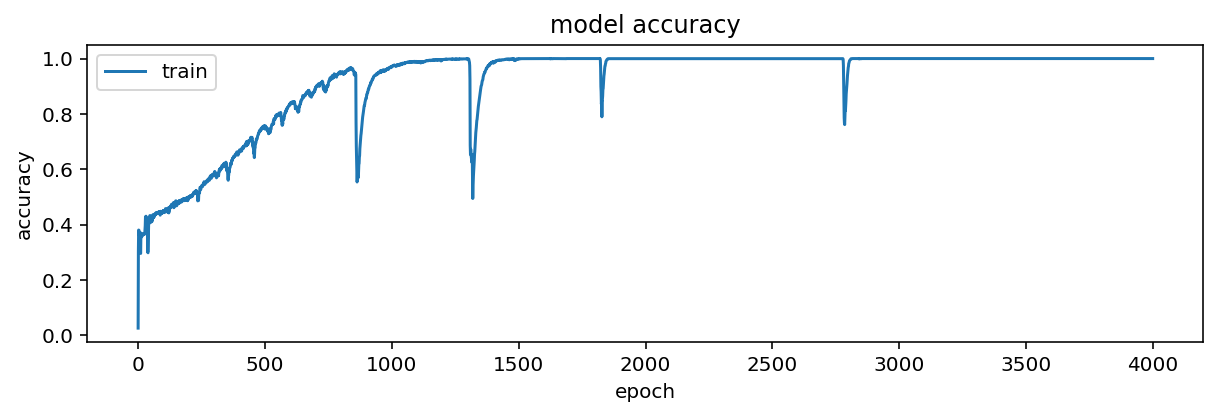

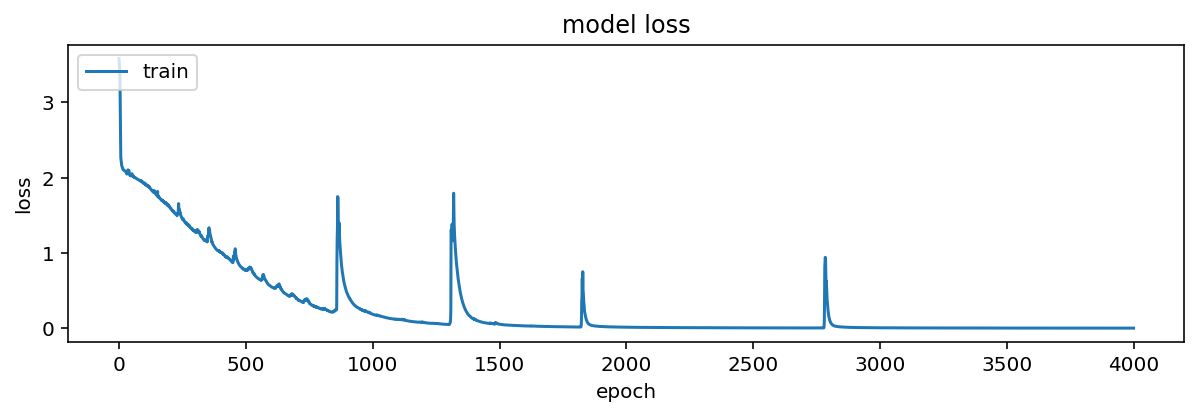

In [6]:
pylab.rcParams['figure.figsize'] = (10, 6)

# summarize history for accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.legend(['train'], loc='upper left')
plt.show()